In [1]:
import warnings
warnings.filterwarnings('ignore')

## Переобучение и недообучение

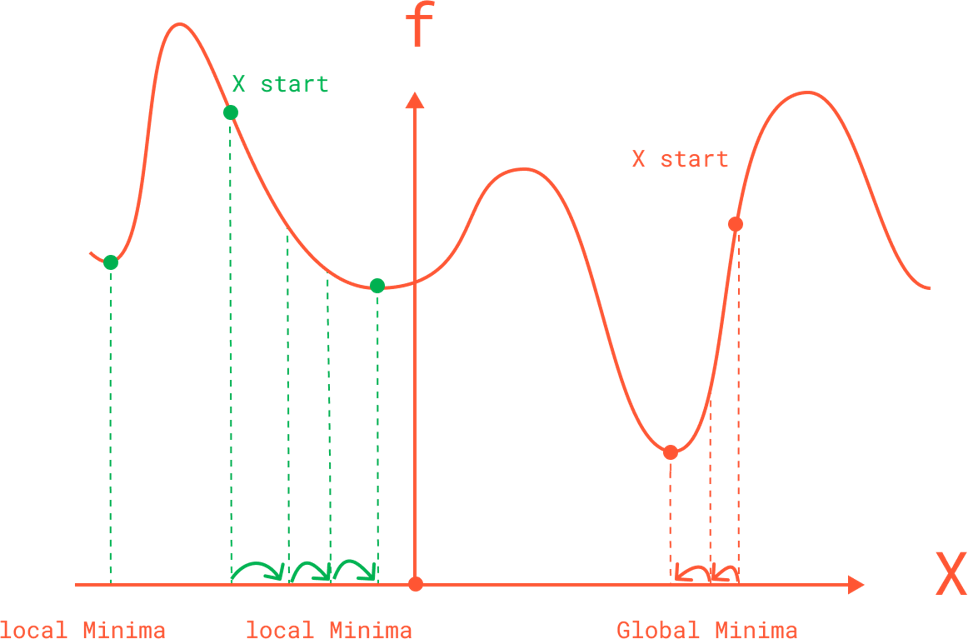


Пусть имеем 2 модели: полиномиальную и обыкновенную немодифицированную линейную без свободного коэффициента

$$
a_1(x) = \beta_1\cdot d + \beta_2 \cdot d^2 + ... + \beta_{25}\cdot d^{25} + \beta_0
$$

$$
a_2(x) = \beta_1\cdot d
$$

Давайте сгенерируем выборку $(X, Y)$ следующим образом. Скажем, что **X** - какие-то случайные числа, равномерно лежащие в отрезке $[0, 20]$. Ответы (вектор таргетов $Y$) - удвоенные **X**-ы, сгенерированные с некоторым шумом, распределенным тоже равномерно на отрезке $[-6, 6]$. 

Разделим выборку на тренировочную и тестовую (например, в пропорциях 4:1) и проверим, в каком случае модель ошибается сильнее: при сложном моделировании или простом?

In [113]:
import numpy as np 

X = np.array(sorted([20*x for x in np.random.rand(120,1)]))

Y = np.array([2 * el + np.random.choice([-1, 1]) * 6 * np.random.rand() for el in X])

In [114]:
X[-10:]

array([[19.09057778],
       [19.15747323],
       [19.20595312],
       [19.2415376 ],
       [19.29913922],
       [19.56603775],
       [19.58769851],
       [19.63685643],
       [19.7578674 ],
       [19.80211402]])

In [115]:
Y[-10:]

array([[36.53757785],
       [38.63674014],
       [32.64809395],
       [35.57820147],
       [33.35831071],
       [43.41052571],
       [41.59818243],
       [39.77467771],
       [38.98113702],
       [38.11239719]])

In [116]:
### Разобьем нашу выборку на train и test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [117]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((72, 1), (48, 1), (72, 1), (48, 1))

In [118]:
### Сохраним упорядоченные индексы наших элементов
### Это понадобится для визуализации!
index_argsort = np.argsort(X_train.reshape(72,))

In [119]:
index_argsort

array([ 4, 18, 17, 47, 54, 46, 70, 57, 39,  6, 13, 16, 43, 19, 52, 42, 41,
       38,  3, 59, 24,  2, 28, 36, 48,  0,  8, 50, 32, 51,  1, 10, 20, 64,
       53, 67, 23, 69, 15, 34, 71, 66, 40, 44, 12, 26, 58, 60, 65, 62, 25,
       45, 29,  9,  5, 37, 49,  7, 55, 33, 56, 61, 11, 63, 68, 30, 22, 31,
       21, 27, 14, 35])

In [120]:
### Построим простую линейную модель
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

In [121]:
### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'


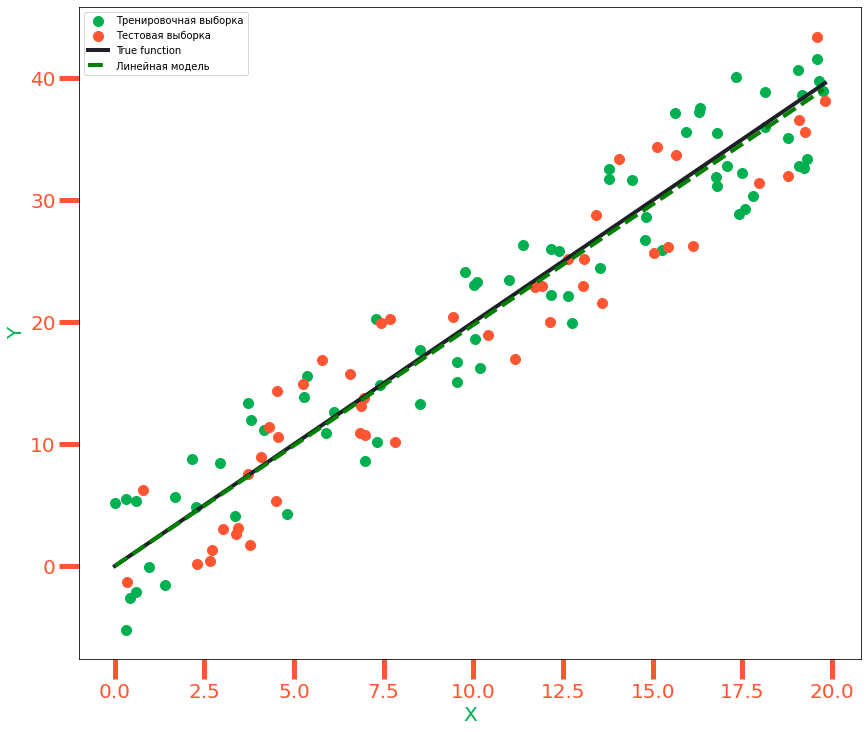

In [122]:
### Изобразим!
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(14, 12)


plt.scatter(X_train, Y_train, c='#00B050', s=100)
plt.scatter(X_test, Y_test, c='#FF5533', s=100)
plt.plot(X, [2*x for x in X], '#1E2027', linewidth=4)
plt.plot(X_train[index_argsort], 
         model.predict(X_train[index_argsort]),
         '--g', linewidth=4)


plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Линейная модель'], loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [123]:
model.coef_

array([[1.97761361]])

In [124]:
### Теперь построим полиномиальную модель

X_pol = X_train.copy()

for k in range(2, 26):
    X_pol = np.append(X_pol, 
                      np.array([x**k for x in X_pol[:, 0]]).reshape(72, -1),
                      axis=1)

In [125]:
X_pol[0]

array([8.50569164e+00, 7.23467903e+01, 6.15359489e+02, 5.23405806e+03,
       4.45192839e+04, 3.78667301e+05, 3.22082729e+06, 2.73953638e+07,
       2.33016517e+08, 1.98196664e+09, 1.68579971e+10, 1.43388925e+11,
       1.21962198e+12, 1.03737285e+13, 8.82357354e+13, 7.50505957e+14,
       6.38357225e+15, 5.42966971e+16, 4.61830962e+17, 3.92819176e+18,
       3.34119878e+19, 2.84192065e+20, 2.41725007e+21, 2.05603837e+22,
       1.74880284e+23])

In [126]:
### Создадим новую модель model_pol

model_pol = LinearRegression()
model_pol.fit(X_pol, Y_train)

LinearRegression()

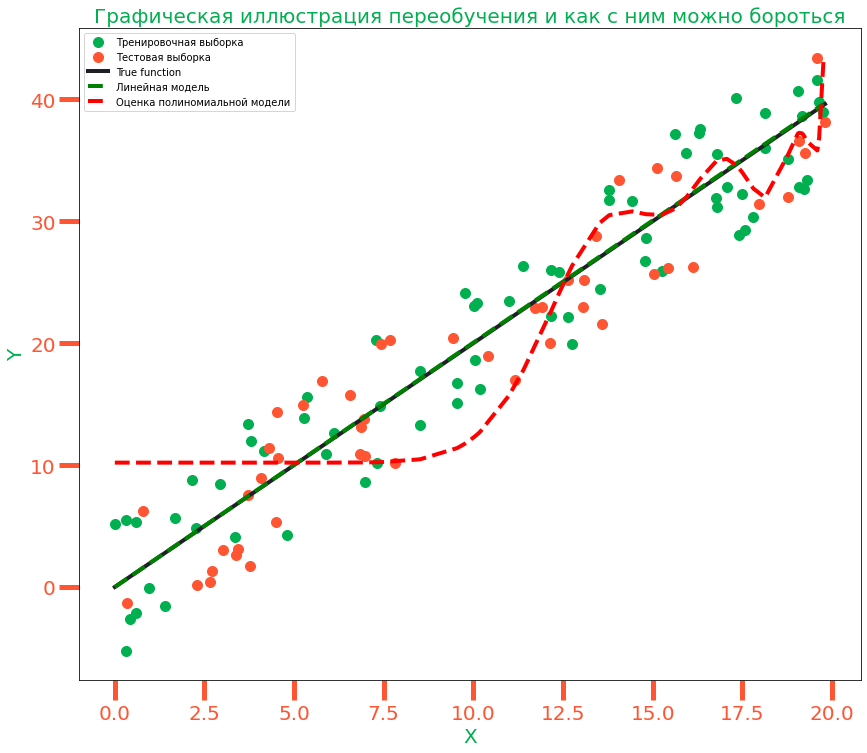

In [127]:
### Изобразим!
import matplotlib.pyplot as plt


fig = plt.figure()
fig.set_size_inches(14, 12)


plt.scatter(X_train, Y_train, c='#00B050', s=100)
plt.scatter(X_test, Y_test, c='#FF5533', s=100)
plt.plot(X, [2*x for x in X], '#1E2027', linewidth=4)
plt.plot(X_train[index_argsort], 
         model.predict(X_train[index_argsort]),
         '--g', linewidth=4)
plt.plot(X_train[index_argsort], 
         model_pol.predict(X_pol[index_argsort]),
         '--r', linewidth=4)


plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Линейная модель', 'Оценка полиномиальной модели'], 
            loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Y')

plt.title('Графическая иллюстрация переобучения и как с ним можно бороться')

plt.show()

In [128]:
np.mean((model.predict(X_train)-Y_train)**2)

13.743837796292661

In [130]:
np.mean((model_pol.predict(X_pol)-Y_train)**2)

33.14358671536971

In [76]:
X_pol_test = X_test.copy()

for k in range(2, 26):
    X_pol_test = np.append(X_pol_test, 
                           np.array([x**k for x in X_pol_test[:, 0]]).reshape(48, -1),
                           axis=1)

In [77]:
np.mean((model_pol.predict(X_pol_test)-Y_test)**2)

55.47488733340119

## Вернемся к реальному практическому примеру

In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np

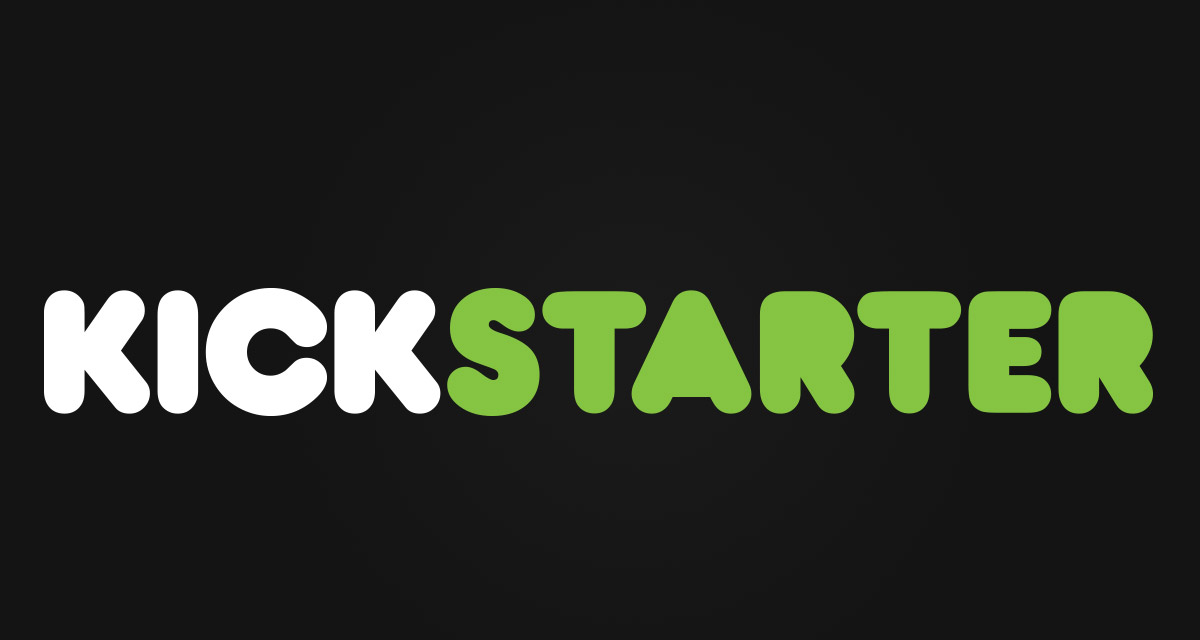

In [79]:
data = pd.read_csv('ks.csv')
data = data[data['Состояние'].isin(['failed', 'successful'])]
x = pd.read_csv('x.csv')
y = pd.read_csv('y.csv')

In [80]:
data.head()

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,Страна,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.0
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.0
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.0
5,New Improv Comedy Venue in Des Moines,Theater,Theater,USD,2013-06-17,2013-05-03 16:17:21,successful,86,US,10030.88,10000.0
6,The Seer and the Sword,Shorts,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,failed,0,US,0.00,10000.0


In [81]:
x.head()

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
0,6035.989239,1000.0,39,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3591.033473,80000.0,87,2009,34.41,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3661.424550,20.0,8,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4321.245721,99.0,79,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6035.989239,1900.0,28,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [82]:
y.head()

,таргет2
0,625.0
1,22.0
2,35.0
3,145.0
4,387.0


In [83]:
### Сейчас будет магия!
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

print('MSE равен: ', int(np.mean((y-model.predict(x))**2)))
print('RMSE равен: ', int(np.mean((y-model.predict(x))**2)**(1/2)))

MSE равен:  9350073813
RMSE равен:  96695


## Замерим качество на Кросс-Валидации!

In [110]:
x

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
0,6035.989239,1000.00,39,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3591.033473,80000.00,87,2009,34.41,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3661.424550,20.00,8,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4321.245721,99.00,79,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6035.989239,1900.00,28,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,7635.064778,35.98,2,2017,34.41,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
331671,38415.722876,271.03,4,2017,34.41,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
331672,6098.303122,200.00,3,2017,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
331673,38415.722876,250.00,1,2017,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X_2

,Цель в долларах,Срок,Год публикации,Close_brent
176128,1000.00,39,2009,34.41
241929,80000.00,87,2009,34.41
244460,20.00,8,2009,34.41
80845,99.00,79,2009,34.41
181197,1900.00,28,2009,34.41
...,...,...,...,...
247730,35.98,2,2017,34.41
318187,271.03,4,2017,34.41
264474,200.00,3,2017,34.41
293634,250.00,1,2017,34.41


In [86]:
### Метод KFOLD
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=33)

In [88]:
kf.get_n_splits()

10

In [89]:
kf.split(x)

<generator object _BaseKFold.split at 0x147bd1e40>

In [92]:
x.values

array([[6.03598924e+03, 1.00000000e+03, 3.90000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.59103347e+03, 8.00000000e+04, 8.70000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.66142455e+03, 2.00000000e+01, 8.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.09830312e+03, 2.00000000e+02, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.84157229e+04, 2.50000000e+02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.31302001e+03, 3.92060000e+02, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [100]:
losses_test = []
losses_train = []

for train_index, test_index in kf.split(x):
    
    X_train, X_test = x.values[train_index], x.values[test_index]
    Y_train, Y_test = y.values[train_index], y.values[test_index]
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    losses_test.append(np.mean((model.predict(X_test)-Y_test)**2)**(1/2))
    losses_train.append(np.mean((model.predict(X_train)-Y_train)**2)**(1/2))

In [101]:
losses_test

[62086.32636224951,
 81498.61480295837,
 77719.14170706202,
 56776.97106383867,
 75695.26354387432,
 122435.17332438013,
 72716.69939400592,
 135797.27257766185,
 70342.89203753974,
 156078.93731594118]

In [102]:
losses_train

[99803.49928884176,
 98239.61102586007,
 98579.33641336297,
 100154.19295346881,
 98754.39314596503,
 93399.61115690188,
 99002.49495307961,
 91324.59445155814,
 99192.9325578141,
 87650.01951269837]

In [103]:
np.mean(losses_test)

91114.72921295118

In [104]:
np.mean(losses_train)

96610.06854595507

## Стоило ли нам обрабатывать категориальные признаки?

In [105]:
data['Дедлайн'] = pd.to_datetime(data['Дедлайн'])
data['Дата публикации'] = pd.to_datetime(data['Дата публикации'])

data['Срок'] = (data['Дедлайн'] - data['Дата публикации']).dt.days

### Выделим год запуска проекта
data['Год публикации'] = data['Дата публикации'].dt.year

Macro = pd.read_excel("macrofeatures.xlsx", engine="openpyxl")

### Смерджим колонки. Оставим от макрофичей какую-нибудь одну.

Macro = Macro[['Close_brent', 'dlk_cob_date']].drop_duplicates()
Macro['dlk_cob_date'] = pd.to_datetime(Macro['dlk_cob_date'])

data['Дата публикации'] = data['Дата публикации'].astype('datetime64[ns]')

data = pd.merge(data,
         Macro,
         left_on=['Дата публикации'],
         right_on=['dlk_cob_date'],
         how='left')

data = data.sort_values('Дата публикации')

data['Close_brent'] = data['Close_brent'].fillna(34.41)

data = data.drop(['Дедлайн', 'Дата публикации', 'dlk_cob_date'], axis=1)

### Уберем колонки Дедлайн, Дата запуска, Инвесторы, Название, Страна

data = data.drop(['Название', 'Страна', 'Инвесторов'], axis=1)


In [106]:
data.head()

,Категория,Главная категория,Валюта,Состояние,Собрано в долларах,Цель в долларах,Срок,Год публикации,Close_brent
176128,Fashion,Fashion,USD,failed,625.0,1000.0,39,2009,34.41
241929,Shorts,Film & Video,USD,failed,22.0,80000.0,87,2009,34.41
244460,Illustration,Art,USD,successful,35.0,20.0,8,2009,34.41
80845,Software,Technology,USD,successful,145.0,99.0,79,2009,34.41
181197,Fashion,Fashion,USD,failed,387.0,1900.0,28,2009,34.41


In [107]:
X_2  = data.drop(['Категория', 'Главная категория',
                  'Валюта', 'Состояние', 'Собрано в долларах'],
                 axis=1)

Y_2 = data['Собрано в долларах']

In [29]:
X_2

,Цель в долларах,Срок,Год публикации,Close_brent
176128,1000.00,39,2009,34.41
241929,80000.00,87,2009,34.41
244460,20.00,8,2009,34.41
80845,99.00,79,2009,34.41
181197,1900.00,28,2009,34.41
...,...,...,...,...
247730,35.98,2,2017,34.41
318187,271.03,4,2017,34.41
264474,200.00,3,2017,34.41
293634,250.00,1,2017,34.41


In [108]:
losses_test = []
losses_train = []

for train_index, test_index in kf.split(x):
    X_train, X_test = X_2.values[train_index], X_2.values[test_index]
    Y_train, Y_test = Y_2.values[train_index], Y_2.values[test_index]
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    loss_test = np.mean((model.predict(X_test)-Y_test)**2)
    loss_train = np.mean((model.predict(X_train)-Y_train)**2)
    
    losses_test.append(loss_test**(1/2))
    losses_train.append(loss_train**(1/2))

In [109]:
np.mean(losses_train), np.mean(losses_test)

(96661.76489590296, 93950.73076920239)